In [408]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [409]:
data = pd.read_csv('BreastCancer.csv')
print(data.shape)

(569, 33)


In [410]:
# to check the number of hull values in the column
data.isnull().sum()
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [411]:
data.drop(['Unnamed: 32','id'],axis = 1, inplace = True)

In [412]:
target = data["diagnosis"]
data.drop(['diagnosis'],axis = 1, inplace = True)

In [413]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.1, random_state = 1234)

In [414]:
print(test_x.shape)
print(test_y.shape)

(57, 30)
(57,)


In [415]:
train_y = np.where(train_y.values == 'M', 1, 0)

print(train_y)

[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 

In [416]:
test_y = np.where(test_y.values == 'M', 1, 0)

print(test_y)

[0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0]


In [417]:
sca = StandardScaler()
sca.fit(data)

StandardScaler()

In [418]:
train_x = sca.transform(train_x)
test_x = sca.transform(test_x)

In [419]:
train_x = torch.tensor(train_x, dtype = torch.float32)
test_x = torch.tensor(test_x, dtype = torch.float32)
train_y = torch.tensor(train_y, dtype = torch.float32)
train_y = torch.tensor(train_y, dtype = torch.float32)

/var/folders/t3/l8scb2b52bdd8cw21j8ly1r40000gn/T/ipykernel_17488/3726554260.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_y, dtype = torch.float32)


In [420]:
class Logistic_Regression(nn.Module):
    def __init__(self, in_params):
        super(Logistic_Regression, self).__init__()
        self.layer1 = nn.Linear(in_params, 1)
        self.layer2 = nn.Sigmoid()
    def forward(self, data):
        out0 = self.layer1(data)
        out1 = self.layer2(out0)
        return out1


In [421]:
model = Logistic_Regression(30)

In [422]:
loss_fn = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 0.1)

In [423]:
no_of_epochs = 150
all_losses = []



for epoch in range(no_of_epochs):
    y_predict = model(train_x)
    loss = loss_fn(y_predict.squeeze(), train_y)
    all_losses.append(loss.detach().numpy())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    


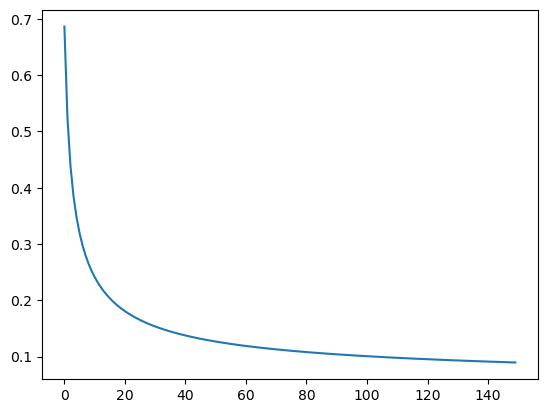

In [424]:
plt.plot(all_losses)

In [425]:
print(test_x.type)

<built-in method type of Tensor object at 0x10f971790>


In [426]:
with torch.no_grad():
    output = model(test_x)
    output = output.squeeze()
    prediction = output.detach().numpy()
    

In [427]:
predicted_boolean = []

for x in prediction:
    if(x>=0.5):
        predicted_boolean.append(1)
    else:
        predicted_boolean.append(0)

In [428]:
#evaluation predicted and test_y using eval class

class eval:
    def __init__(self):
        self.hits = 0
    def prediction_eval(self,predicted_boolean,test_y):
        n = len(predicted_boolean)
        for i in range(n):
            if(predicted_boolean[i] == test_y[i]):
                self.hits+=1
        return self.hits

n = len(predicted_boolean)
eval = eval()
hits = eval.prediction_eval(predicted_boolean,test_y)
model_accuracy = (hits/n)*100
print(model_accuracy)

96.49122807017544
